В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt

# Завантаження даних
from keras.datasets import imdb

In [3]:

max_features = 10000  # обмеження на кількість слів (за частотою вживання)
maxlen = 500  # обмеження на кількість слів в кожній рецензії

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Функція для побудови та тренування моделі
def build_and_train_model(model_type):
    model = Sequential()

    if model_type == 'SimpleRNN':
        model.add(Embedding(max_features, 32))
        model.add(SimpleRNN(32))
    elif model_type == 'LSTM':
        model.add(Embedding(max_features, 32))
        model.add(LSTM(32))
    elif model_type == 'Bidirectional':
        model.add(Embedding(max_features, 32))
        model.add(Bidirectional(LSTM(32)))
    elif model_type == 'DeepRNN':
        model.add(Embedding(max_features, 32))
        model.add(SimpleRNN(32, return_sequences=True))
        model.add(SimpleRNN(32))
    else:
        raise ValueError("Невідомий тип моделі")

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
    return history

# Тренування моделей
simple_rnn_history = build_and_train_model('SimpleRNN')
lstm_history = build_and_train_model('LSTM')
bidirectional_history = build_and_train_model('Bidirectional')
deep_rnn_history = build_and_train_model('DeepRNN')


17464789/17464789 [==============================] - 3s 0us/step
Epoch 1/10
157/157 [==============================] - 19s 115ms/step - loss: 0.6192 - acc: 0.6383 - val_loss: 0.4796 - val_acc: 0.7812
Epoch 2/10
157/157 [==============================] - 17s 108ms/step - loss: 0.4047 - acc: 0.8264 - val_loss: 0.6309 - val_acc: 0.7342
Epoch 3/10
157/157 [==============================] - 16s 102ms/step - loss: 0.3045 - acc: 0.8784 - val_loss: 0.3465 - val_acc: 0.8622
Epoch 4/10
157/157 [==============================] - 16s 103ms/step - loss: 0.2504 - acc: 0.9020 - val_loss: 0.3941 - val_acc: 0.8364
Epoch 5/10
157/157 [==============================] - 16s 102ms/step - loss: 0.2192 - acc: 0.9145 - val_loss: 0.3725 - val_acc: 0.8456
Epoch 6/10
157/157 [==============================] - 16s 102ms/step - loss: 0.1751 - acc: 0.9366 - val_loss: 0.4138 - val_acc: 0.8372
Epoch 7/10
157/157 [==============================] - 16s 104ms/step - loss: 0.1261 - acc: 0.9558 - val_loss: 0.4060 - val_ac

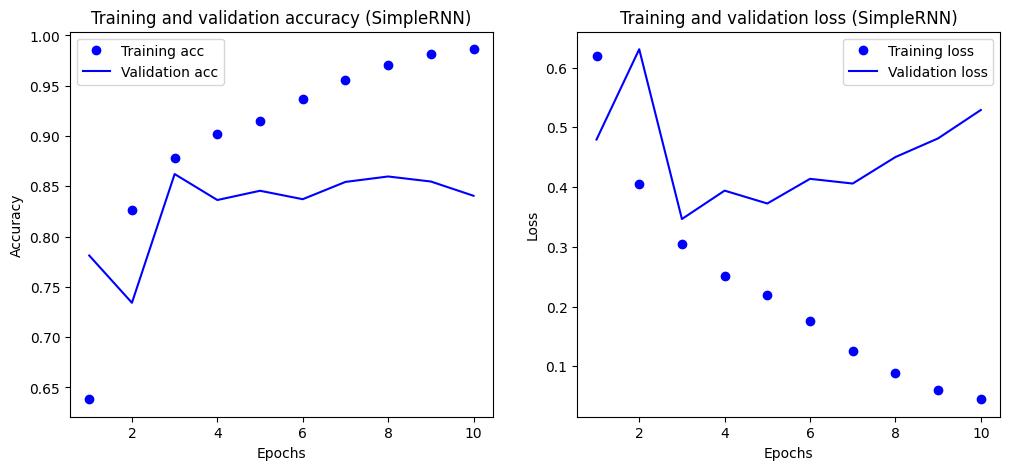

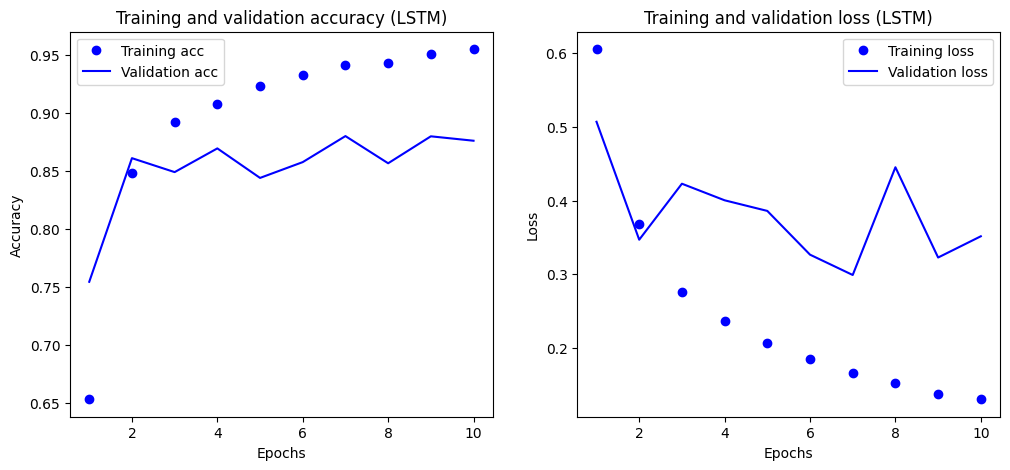

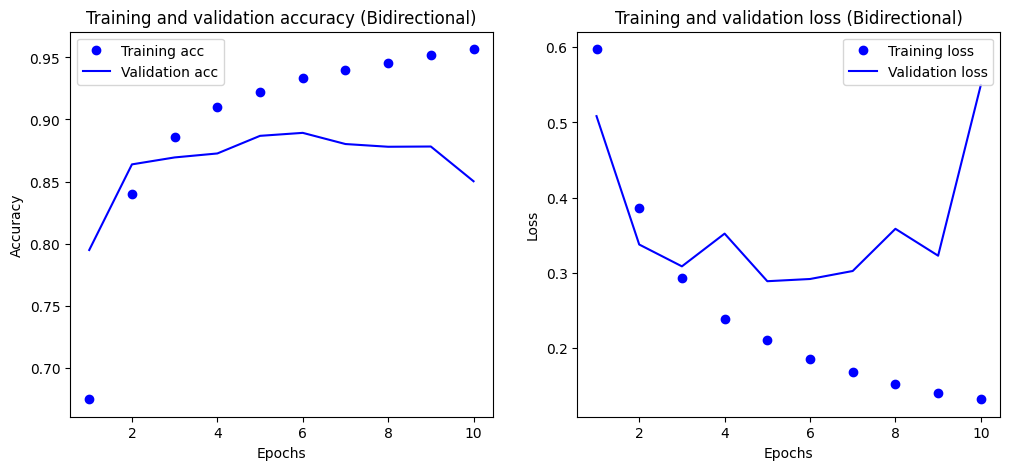

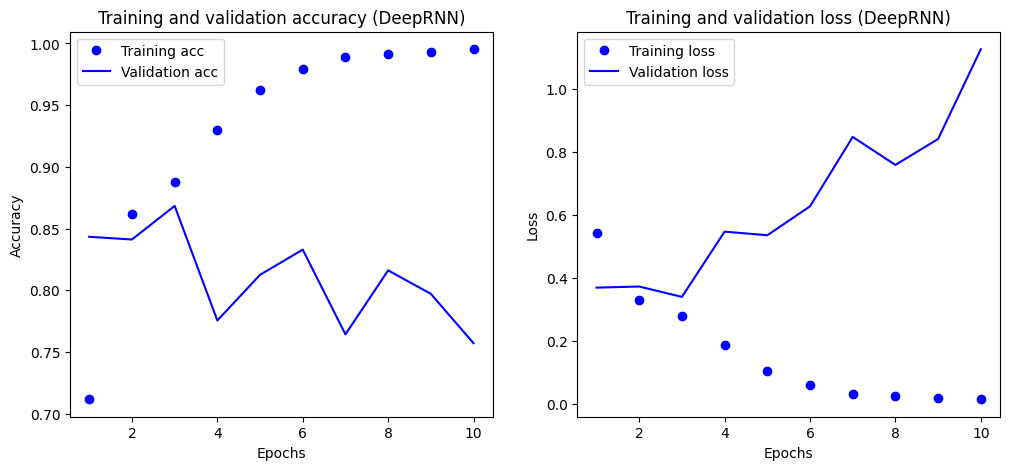

In [4]:
def plot_history(history, model_type):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'Training and validation accuracy ({model_type})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and validation loss ({model_type})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Порівняння результатів
plot_history(simple_rnn_history, 'SimpleRNN')
plot_history(lstm_history, 'LSTM')
plot_history(bidirectional_history, 'Bidirectional')
plot_history(deep_rnn_history, 'DeepRNN')
